# Лабораторная работа № 3 – Регрессионный анализ данных
## 18 вариант
## набор данных - 6
### классификаторы
1 - линейная регрессия без использования регуляризаторов;  
3 - линейная регрессия, RIDGE регуляризатор;

1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).   
mpg - расстояние, которое может проехать машина на одном галлоне топлива  
cylinders - количество цилиндров  
displacement - смещение  
horsepower - количество лошадиных сил  
weight - вес  
acceleration - ускорение  
model year - год выхода  
origin - страна происхождения  
car name- название машины  

In [1]:
import pandas as pd
mpg_df = pd.read_csv('auto-mpg-data.txt',sep= '\s+' ,names = ['mpg','cylinders','displacement','horsepower' , 'weight',
                                                               'acceleration', 'model year', 'origin', 'car name'])
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции; 

In [2]:
print("Размер входных данных до удаления ",mpg_df.shape[0])
mpg_df.drop_duplicates()
nondup_mpg_df = mpg_df.dropna()
print("Размер входных данных после удаления ",nondup_mpg_df.shape[0])

Размер входных данных до удаления  398
Размер входных данных после удаления  398


3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

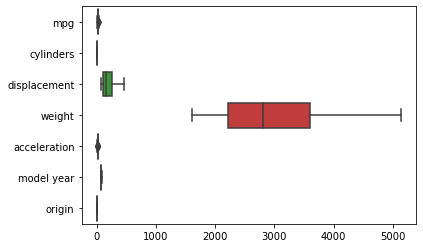

In [3]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.boxplot(data = mpg_df, orient = 'h')

In [4]:
categorical = [i for i in nondup_mpg_df.columns if nondup_mpg_df[i].dtype.name == 'object']
numerical   = [i for i in nondup_mpg_df if nondup_mpg_df[i].dtype.name != 'object']
print ("Категориальные признаки: ", categorical)
print ("Числовые признаки: ", numerical)

Категориальные признаки:  ['horsepower', 'car name']
Числовые признаки:  ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']


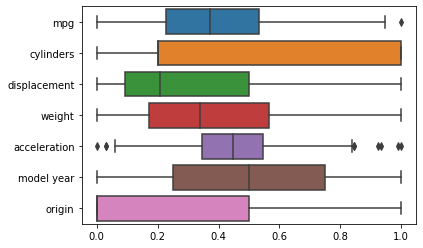

In [5]:
scaler = MinMaxScaler()
nondup_mpg_df[numerical] = scaler.fit_transform(nondup_mpg_df[numerical].values.astype(float))
sns.boxplot(data = nondup_mpg_df, orient = 'h')

4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [6]:
nondup_mpg_df = pd.get_dummies(nondup_mpg_df, columns = ['car name'])
nondup_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,0.239362,1.0,0.617571,130.0,0.536150,0.238095,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.159574,1.0,0.728682,165.0,0.589736,0.208333,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.239362,1.0,0.645995,150.0,0.516870,0.178571,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.186170,1.0,0.609819,150.0,0.516019,0.238095,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.212766,1.0,0.604651,140.0,0.520556,0.148810,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,86.00,0.333711,0.452381,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0.930851,0.2,0.074935,52.00,0.146583,0.988095,1.0,0.5,0,0,...,0,0,0,0,0,0,1,0,0,0
395,0.611702,0.2,0.173127,84.00,0.193365,0.214286,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0.505319,0.2,0.134367,79.00,0.286929,0.630952,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

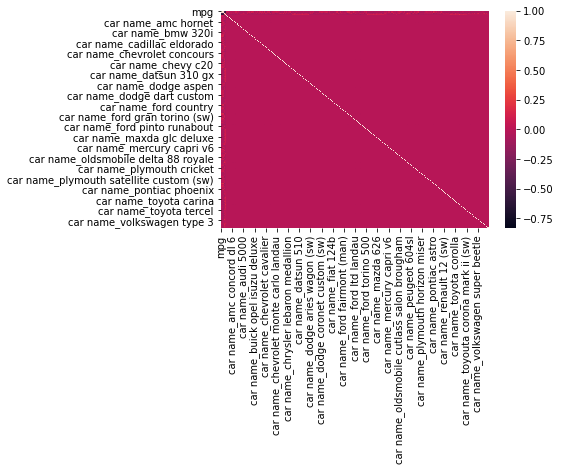

In [7]:
correl = nondup_mpg_df.corr()
sns.heatmap(correl)

6.	Заполните пропущенные значения в данных;  

In [26]:
nondup_mpg_df.count()

mpg                              398
cylinders                        398
displacement                     398
horsepower                       398
weight                           398
                                ... 
car name_vw dasher (diesel)      398
car name_vw pickup               398
car name_vw rabbit               398
car name_vw rabbit c (diesel)    398
car name_vw rabbit custom        398
Length: 313, dtype: int64

Пропущенных значений нет

7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.  
1 - линейная регрессия без использования регуляризаторов;  
3 - линейная регрессия, RIDGE регуляризатор;

In [8]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr
lire = LinearRegression()
nondup_mpg_df = nondup_mpg_df.drop(['horsepower'], axis = 1)
x = nondup_mpg_df.drop(['mpg'], axis = 1)
y = nondup_mpg_df['mpg']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [41]:
lire.fit(x_train,  y_train)
lire_pr = lire.predict( x_test)
spearman = spearmanr(lire_pr, y_test)
print('Коэффициенты корелляции')
print('Пирсона - ', pearsonr(lire_pr, y_test))
print('Спирмена -', spearman)

Коэффициенты корелляции
Пирсона -  (0.008608509993191592, 0.9256523806101069)
Спирмена - SpearmanrResult(correlation=0.0457748525942496, pvalue=0.61957679663544)


In [11]:
import numpy as np
rg = Ridge()
grid_rg = GridSearchCV(rg,{'alpha': np.linspace(1, 5, 25)})
grid_rg = grid_rg.fit(x_train, y_train)
alpha = grid_rg.best_estimator_.alpha
#max_iter = grid_rg.best_estimator_.max_iter
rg = Ridge(alpha = alpha)
rg.fit(x_train, y_train)
rg_pr =rg.predict(x_test)


In [12]:
spearman = spearmanr(rg_pr, y_test)
print('Коэффициенты корелляции')
print('Пирсона - ', pearsonr(rg_pr, y_test))
print('Спирмена -', spearman)

Коэффициенты корелляции
Пирсона -  (0.8693472207821425, 6.388999448095198e-38)
Спирмена - SpearmanrResult(correlation=0.8984087928096527, pvalue=5.498572749718412e-44)
